# #Importing reqired packages


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# #Dataset collection 

In [2]:
data=pd.read_csv('water_dataX.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [4]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [5]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

# # Data preprocessing

In [6]:
data.info

<bound method DataFrame.info of      STATION CODE                                          LOCATIONS  \
0            1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1            1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2            1475                                ZUARI AT PANCHAWADI   
3            3181                        RIVER ZUARI AT BORIM BRIDGE   
4            3182                       RIVER ZUARI AT MARCAIM JETTY   
...           ...                                                ...   
1986         1330            TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU   
1987         1450  PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...   
1988         1403                 GUMTI AT U/S SOUTH TRIPURA,TRIPURA   
1989         1404                GUMTI AT D/S SOUTH TRIPURA, TRIPURA   
1990         1726   CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA   

            STATE  Temp D.O. (mg/l)   PH CONDUCTIVITY (µmhos/cm)  \
0     DAMAN & DIU  30.6         6.7

In [7]:
data.shape

(1991, 12)

# Handling Missing Values

In [8]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [9]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [10]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [11]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [12]:
data['Temp']=pd.to_numeric(data[ 'Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'], errors='coerce') 
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [13]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [14]:
start = 1
end = 1779
station = data.iloc[start:end, 0]
location = data.iloc[start:end ,1]
state = data.iloc[start:end, 2]
do = data.iloc[start:end, 4].astype(np.float64)

value=0

ph = data.iloc[ start:end, 5]  
co = data.iloc [start:end, 6].astype(np.float64)   
  
year = data.iloc[start:end, 11]
tc = data.iloc[2:end, 10].astype(np.float64)


bod = data.iloc[start:end, 7].astype(np.float64)
na = data.iloc[start:end, 8].astype(np.float64)
na.dtype

dtype('float64')

In [15]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,11,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428,5500.0,2014


In [16]:
data['Temp'].fillna(data['Temp'].mean(), inplace=True) 
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(), inplace=True)

data['PH'].fillna(data['PH'].mean(),inplace=True)

data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(), inplace=True)

data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)

data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(), inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(), inplace=True)

In [17]:
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [18]:
data=data.rename(columns={'D.O. (mg/l)':'do'})
data=data.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns={'B.O.D. (mg/l)':'bod'})
data=data.rename(columns={'NITRATENAN N+ NITRITENANN (mg/1)':'na'})
data=data.rename(columns={'TOTAL COLIFORM (MPN/100ml) Mean': 'tc'})
data=data.rename(columns={'STATION CODE': 'station'})
data=data.rename(columns={'LOCATIONS': 'location'})
data=data.rename(columns={'STATE': 'state'})
data=data.rename(columns={'PH':'ph'})

In [19]:
data = pd.concat([station,location,state,do,ph,co,bod,na,tc,year], axis=1)

data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [20]:
data.head()

,station,location,state,do,ph,co,bod,na,tc,year
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014


# Calculating Water Quality Index(WQI)

In [21]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

In [22]:
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [23]:
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [24]:
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [25]:
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [26]:
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [27]:
data.head()

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014,100,80,0,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,100,80,40,100,80,100
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,100,80,40,100,80,100


In [28]:
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [29]:
# Calculate  water quality index WQI
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281

In [30]:
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 

In [31]:
data.head()

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.2,NaN,2014,...,100,60,100,16.5,22.48,23.40,0.54,2.8,0.00,65.72
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [32]:
#Calculating overall wqi for each year
average=data.groupby('year')['wqi'].mean()

In [33]:
average.head()

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
Name: wqi, dtype: float64

In [34]:
data=average.reset_index(level=0,inplace=False)
data

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.833852


In [35]:
year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')


# Data Visualization

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [37]:
from mpl_toolkits.mplot3d import Axes3D

In [38]:
year = data['year'].values
AQI = data['wqi'].values
data['wqi'] = pd.to_numeric(data['wqi'], errors = 'coerce')
data['wqi'] = pd.to_numeric(data['wqi'], errors = 'coerce')

c:\users\samit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


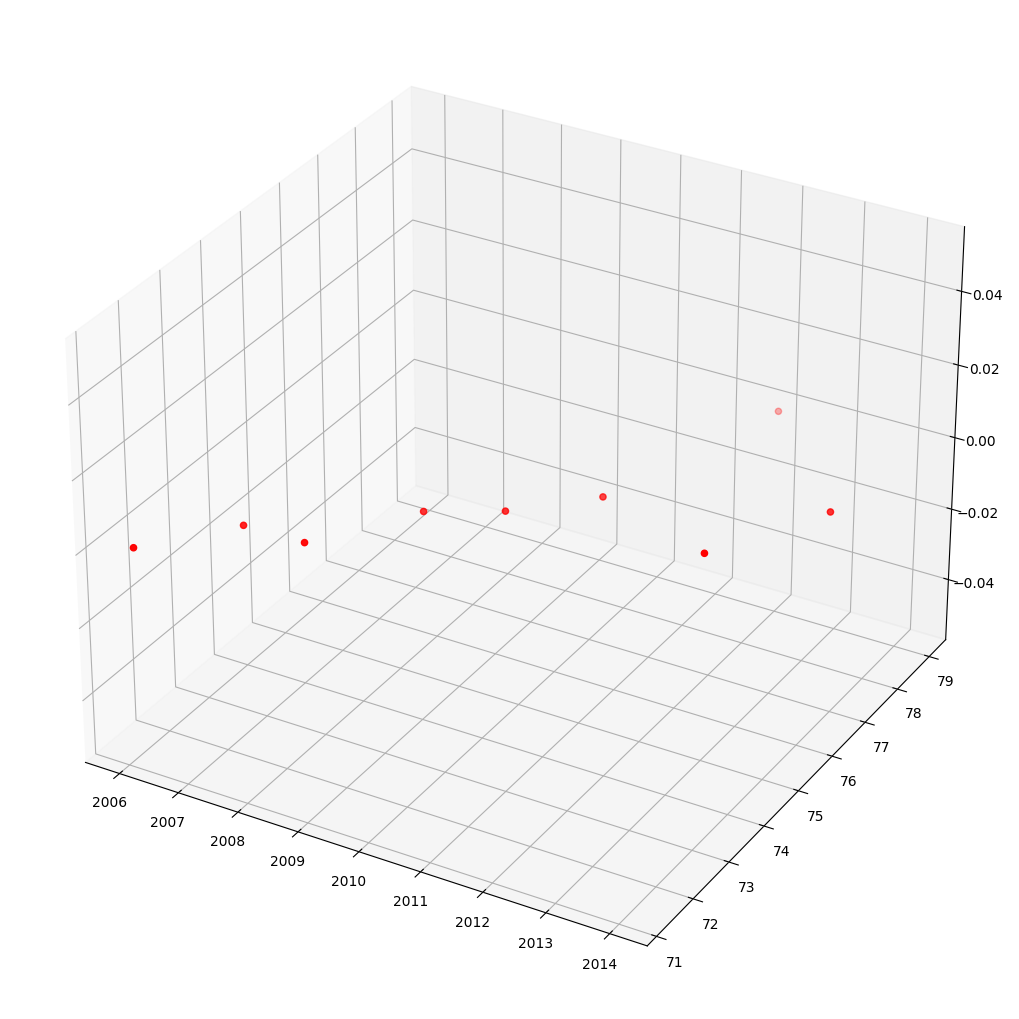

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723
5,2011,75.647013
6,2012,78.969041
7,2013,75.009425
8,2014,76.833852


In [39]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year, AQI, color = 'red')
plt.show()
data

In [40]:
data = data[np.isfinite(data['wqi'])]
data.head()

,year,wqi
0,2006,71.308824
1,2007,72.549000
2,2008,72.570943
3,2009,74.085193
4,2010,74.648723


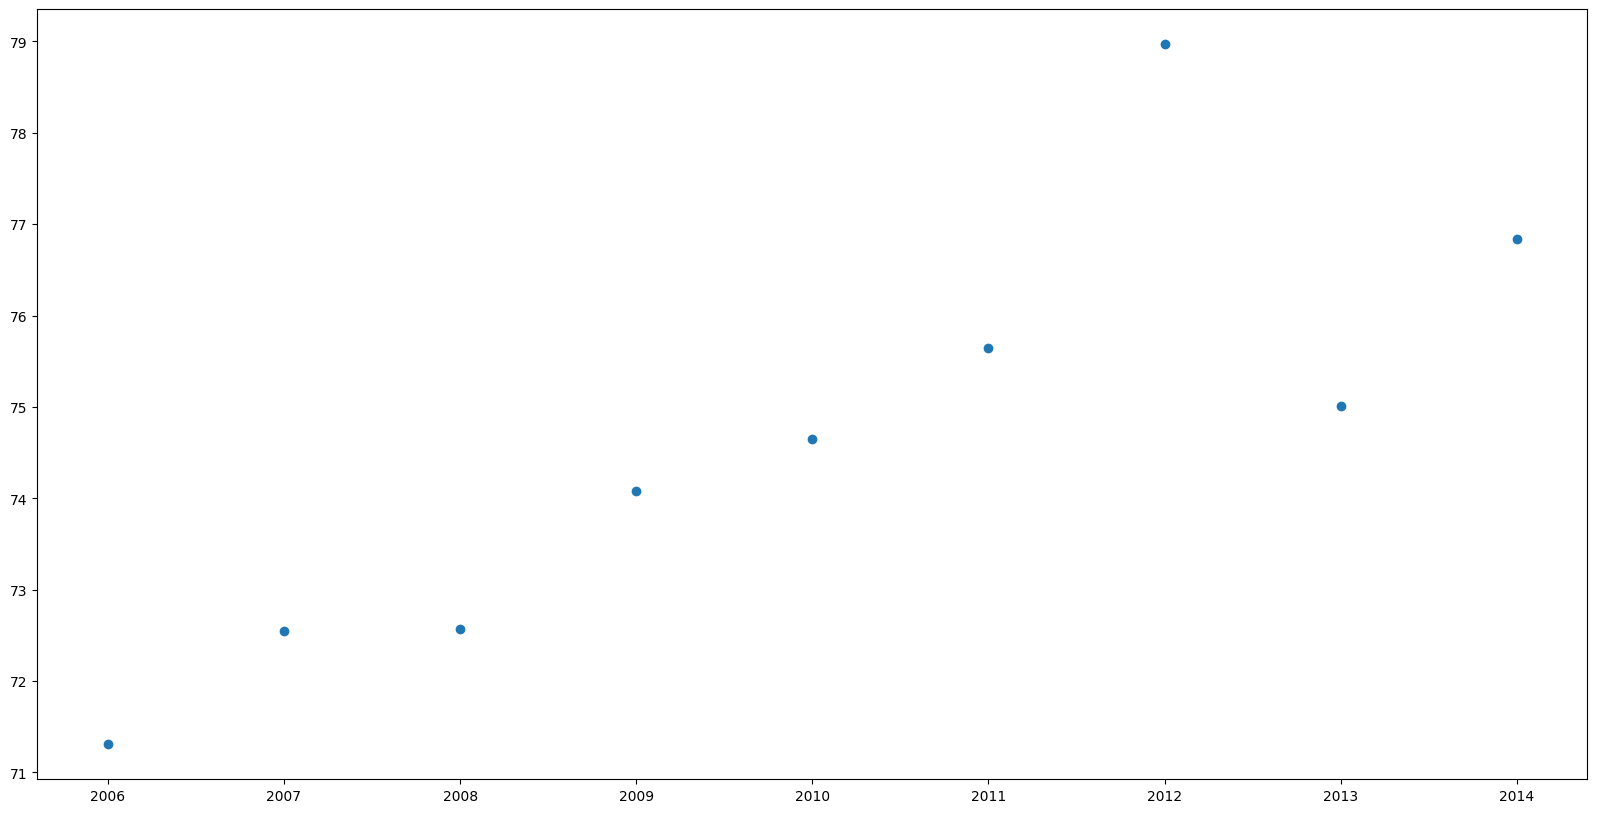

In [41]:
#scatter plot of data points
cols = ['year']
y = data['wqi']
x = data[cols]

plt.scatter(x, y)
plt.show()

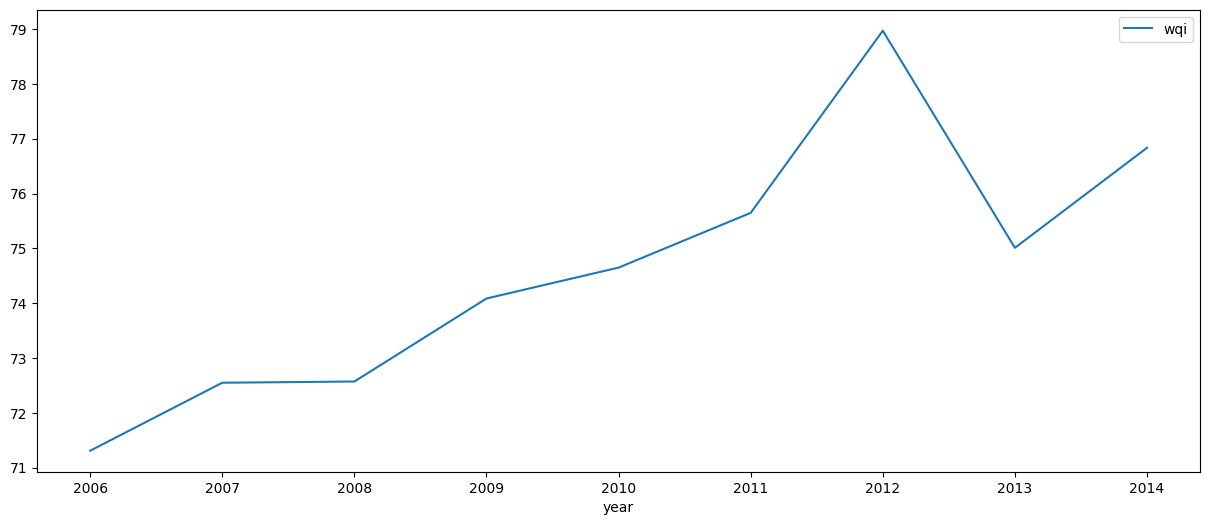

In [42]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

# Splitting data into Train & Test

In [43]:
from sklearn import neighbors, datasets
data = data.reset_index(level = 0, inplace = False)

In [44]:
from sklearn import linear_model

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 10)

In [46]:
X_train

,year
5,2011
6,2012
3,2009
1,2007
0,2006
7,2013
4,2010


In [47]:
y_train

5    75.647013
6    78.969041
3    74.085193
1    72.549000
0    71.308824
7    75.009425
4    74.648723
Name: wqi, dtype: float64

In [48]:
X_test

,year
8,2014
2,2008


In [49]:
y_test

8    76.833852
2    72.570943
Name: wqi, dtype: float64

In [50]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [51]:
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,index,year,wqi
0,0,2006,71.308824
1,1,2007,72.549000
2,2,2008,72.570943
3,3,2009,74.085193
4,4,2010,74.648723
5,5,2011,75.647013
6,6,2012,78.969041
7,7,2013,75.009425
8,8,2014,76.833852


In [53]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [54]:
cols =['year']

In [55]:
y = data['wqi']
x=data[cols]

In [56]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
reg.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred = reg.predict(X_test)

In [58]:
from sklearn import metrics
print ('MAE:',metrics.mean_absolute_error(y_test,y_pred))

MAE: 2.485047305973559


In [59]:
print(('MSE:',metrics.mean_squared_error(y_test,y_pred)))

('MSE:', 7.098694104379742)


In [60]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 2.6643374606794357


In [61]:
metrics.r2_score(y_test,y_pred)

-88.41375190309928

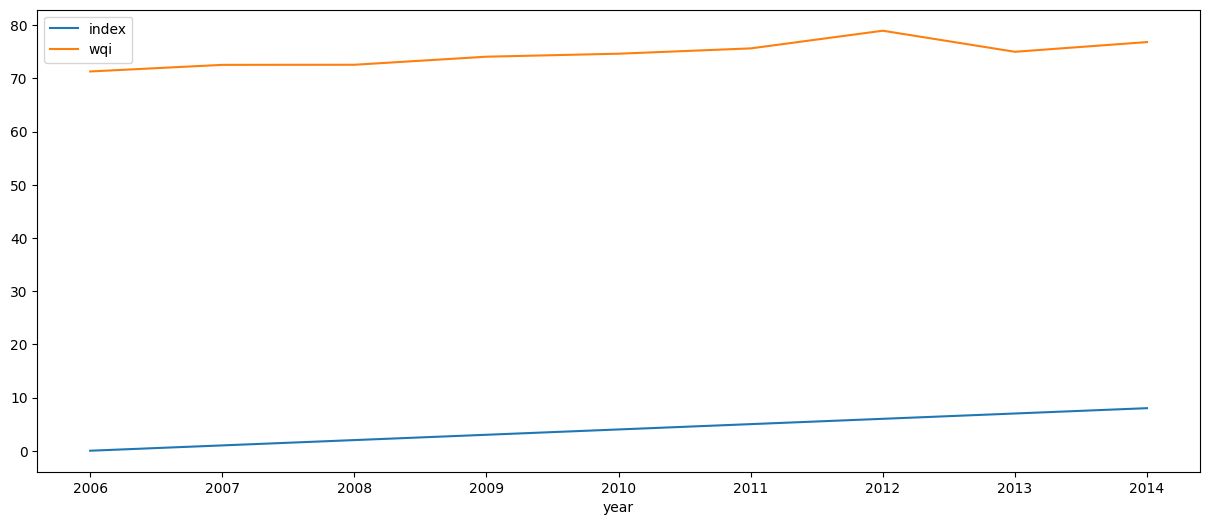

In [62]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [63]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,year,index,wqi
0,2006,0,71.308824
1,2007,1,72.549000
2,2008,2,72.570943
3,2009,3,74.085193
4,2010,4,74.648723
5,2011,5,75.647013
6,2012,6,78.969041
7,2013,7,75.009425
8,2014,8,76.833852


In [64]:
a=reg.predict(x_test)
a

array([73.85895419, 74.59338162])

In [65]:
y_test

3    74.085193
4    74.648723
Name: wqi, dtype: float64

In [66]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.03


In [67]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a})

In [68]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.46059349],
       [ 1.        , -1.09544512],
       [ 1.        , -0.73029674],
       [ 1.        , -0.36514837],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.36514837],
       [ 1.        ,  0.73029674],
       [ 1.        ,  1.09544512],
       [ 1.        ,  1.46059349]])

In [69]:
alpha = 0.1 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 74.62, 2.00


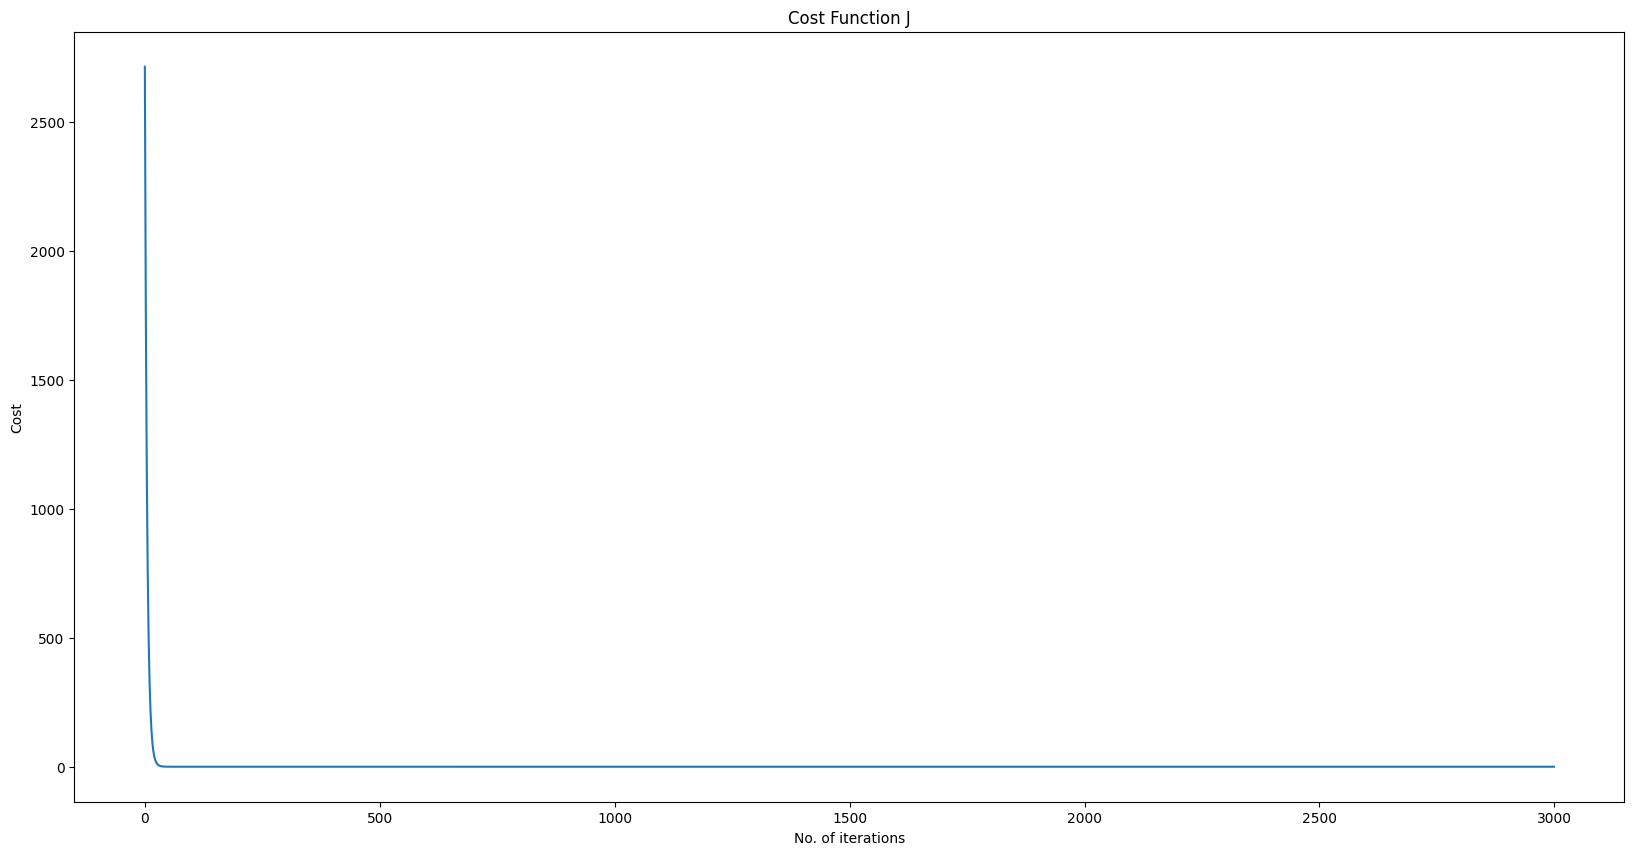

In [70]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [71]:
#prediction of january(2013-2015) across india
import numpy as np
newB=[74.76, 2.13]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt

,year,index,wqi,Actual,Predicted
0,2006,0,71.308824,71.308824,71.648936
1,2007,1,72.549000,72.549000,72.426702
2,2008,2,72.570943,72.570943,73.204468
3,2009,3,74.085193,74.085193,73.982234
4,2010,4,74.648723,74.648723,74.760000
5,2011,5,75.647013,75.647013,75.537766
6,2012,6,78.969041,78.969041,76.315532
7,2013,7,75.009425,75.009425,77.093298
8,2014,8,76.833852,76.833852,77.871064


In [72]:
#testing the accuracy of the model

from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

1.2030677776262582


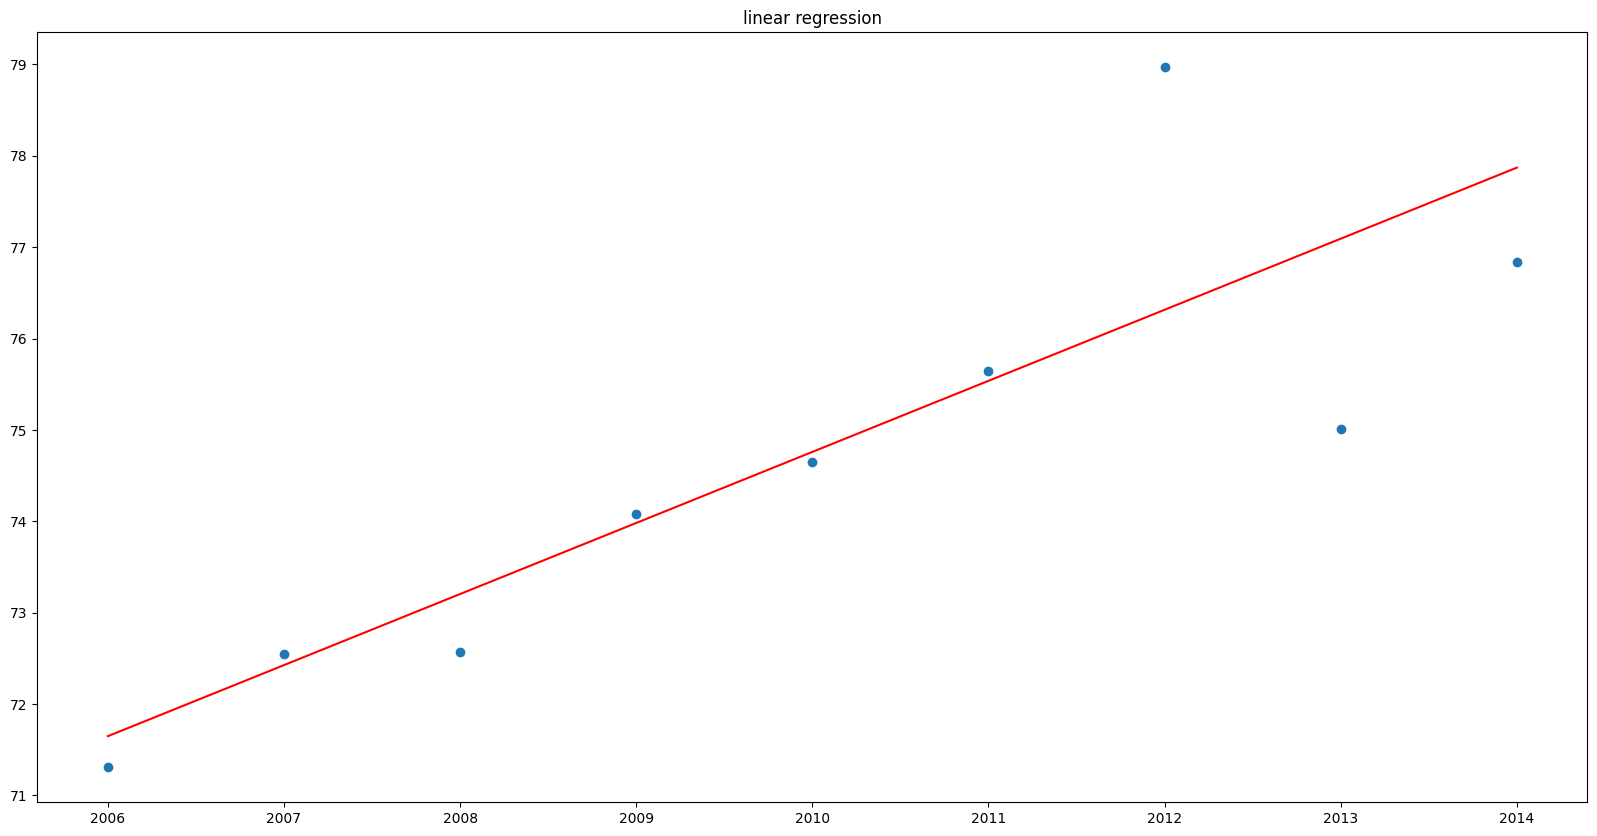

In [73]:
#plotting the actual and predicted results
x_axis=dt.year
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()


<AxesSubplot:>

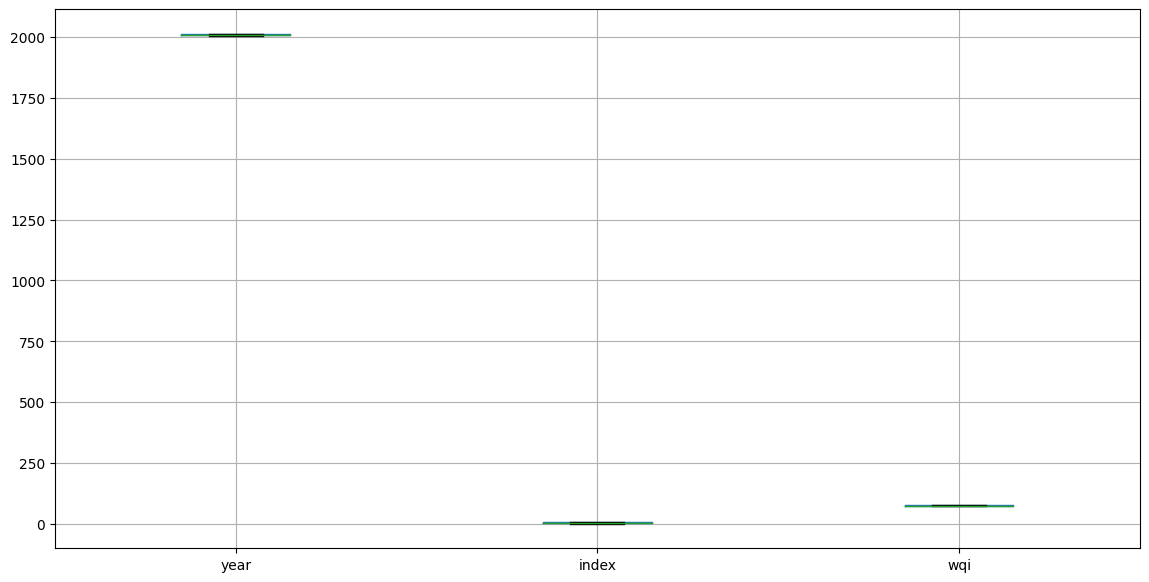

In [74]:
data.boxplot(figsize=(14,7))

In [75]:
#Splitting the data into dependent and independent variables
x = data.iloc[:,1:7].values


In [76]:
x.shape

(9, 2)

In [77]:
y = data.iloc[:,7:].values

In [78]:
y.shape

(9, 0)

In [79]:
a=reg.predict(x_test)
a

array([73.85895419, 74.59338162])

In [80]:
y_test

3    74.085193
4    74.648723
Name: wqi, dtype: float64

In [81]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:0.03


In [82]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a})

In [83]:
#using gradient descent to optimize it further
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        , -1.11068591,  0.90399236],
       [ 1.        , -1.08243305,  0.9390309 ],
       [ 1.        , -1.05418019,  0.93965086],
       [ 1.        , -1.02592733,  0.98243275],
       [ 1.        , -0.99767447,  0.99835409],
       [ 1.        , -0.9694216 ,  1.02655863],
       [ 1.        , -0.94116874,  1.12041542],
       [ 1.        , -0.91291588,  1.00854495],
       [ 1.        , -0.88466302,  1.06009024]])

In [84]:
Y = data.iloc[:,1:3].values

In [85]:
import pickle
pickle.dump(reg,open('wqi.pkl','wb'))
model = pickle.load(open('wqi.pkl','rb'))